In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv(r"/content/Delinquency_prediction_dataset .csv")

In [2]:
df

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,CUST0496,71,48307.0,688.0,0.486522,2,0,12707.0,0.373033,retired,9,Business,Phoenix,On-time,On-time,Missed,On-time,On-time,Late
496,CUST0497,60,86180.0,836.0,0.608174,2,1,45595.0,0.291943,Unemployed,18,Student,Houston,On-time,On-time,Late,Late,Late,Missed
497,CUST0498,54,152326.0,847.0,0.676950,0,0,44449.0,0.104839,Employed,16,Student,Phoenix,On-time,Late,Late,On-time,Late,Missed
498,CUST0499,50,105852.0,343.0,0.700643,2,1,11155.0,0.236477,Employed,11,Student,Phoenix,Late,On-time,Late,Missed,On-time,Missed


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           500 non-null    object 
 1   Age                   500 non-null    int64  
 2   Income                461 non-null    float64
 3   Credit_Score          498 non-null    float64
 4   Credit_Utilization    500 non-null    float64
 5   Missed_Payments       500 non-null    int64  
 6   Delinquent_Account    500 non-null    int64  
 7   Loan_Balance          471 non-null    float64
 8   Debt_to_Income_Ratio  500 non-null    float64
 9   Employment_Status     500 non-null    object 
 10  Account_Tenure        500 non-null    int64  
 11  Credit_Card_Type      500 non-null    object 
 12  Location              500 non-null    object 
 13  Month_1               500 non-null    object 
 14  Month_2               500 non-null    object 
 15  Month_3               5

In [4]:
df.isnull().sum()

,0
Customer_ID,0
Age,0
Income,39
Credit_Score,2
Credit_Utilization,0
Missed_Payments,0
Delinquent_Account,0
Loan_Balance,29
Debt_to_Income_Ratio,0
Employment_Status,0


In [5]:
df["Loan_Balance"].isnull().sum()


np.int64(29)

In [6]:
df["Credit_Score"].isnull().sum()

np.int64(2)

In [7]:
df["Income"].isnull().sum()

np.int64(39)

In [8]:
df[df["Income"].isnull()]

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
40,CUST0041,61,NaN,372.0,0.109776,4,0,44454.0,0.114767,Self-employed,12,Student,Los Angeles,Late,Missed,Late,On-time,Late,Late
42,CUST0043,69,NaN,792.0,0.335006,0,1,11155.0,0.313540,retired,9,Business,New York,On-time,Late,Late,Late,Missed,Missed
59,CUST0060,19,NaN,538.0,0.700386,4,0,37445.0,0.399882,EMP,4,Platinum,Phoenix,On-time,Late,Missed,Late,Missed,On-time
66,CUST0067,64,NaN,612.0,0.512006,1,0,99005.0,0.278359,retired,7,Business,New York,On-time,Late,On-time,Missed,On-time,On-time
68,CUST0069,31,NaN,796.0,0.389855,4,0,85026.0,0.413098,employed,13,Student,Chicago,Missed,Late,Missed,Late,Late,Missed
76,CUST0077,71,NaN,611.0,0.677290,6,0,23908.0,0.330511,employed,1,Student,New York,Late,Missed,Late,On-time,Missed,Missed
93,CUST0094,40,NaN,439.0,0.686355,3,0,17401.0,0.360589,Employed,14,Gold,Houston,On-time,Late,Missed,On-time,On-time,Late
113,CUST0114,26,NaN,725.0,0.203943,1,0,77743.0,0.466004,employed,9,Student,Houston,On-time,Late,Late,Late,On-time,On-time
144,CUST0145,57,NaN,694.0,0.849848,0,0,3494.0,0.280432,Unemployed,7,Student,Phoenix,On-time,Missed,On-time,Missed,Late,On-time
153,CUST0154,20,NaN,718.0,0.347552,5,0,39006.0,0.193703,Unemployed,5,Student,New York,On-time,Missed,Missed,Late,Late,Missed


In [9]:
df[df["Loan_Balance"].isnull()]

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
8,CUST0009,36,66991.0,405.0,0.413035,5,1,NaN,0.219854,Employed,12,Student,Phoenix,On-time,On-time,On-time,Missed,Late,On-time
23,CUST0024,47,108468.0,538.0,0.816191,2,1,NaN,0.317053,retired,7,Gold,Phoenix,Late,Late,Late,On-time,Late,Late
25,CUST0026,19,193998.0,515.0,0.255552,5,0,NaN,0.259893,EMP,12,Gold,Phoenix,Late,Missed,On-time,Late,Missed,On-time
28,CUST0029,29,86726.0,588.0,0.598677,2,0,NaN,0.296942,Self-employed,16,Student,Houston,Late,Late,Missed,On-time,Late,On-time
45,CUST0046,54,59238.0,401.0,0.575592,2,1,NaN,0.362442,Unemployed,8,Gold,Los Angeles,On-time,Late,Missed,Missed,Late,On-time
51,CUST0052,35,109074.0,383.0,0.400141,4,0,NaN,0.239205,employed,10,Standard,Houston,Late,Missed,Late,Late,Missed,On-time
52,CUST0053,21,185806.0,823.0,0.349340,4,0,NaN,0.338566,Employed,2,Business,New York,Missed,Missed,Late,On-time,On-time,Missed
102,CUST0103,41,163216.0,429.0,0.631504,1,1,NaN,0.132652,retired,18,Student,Houston,Late,Missed,Late,Late,Missed,On-time
104,CUST0105,42,178165.0,383.0,0.425235,2,0,NaN,0.176706,Self-employed,15,Gold,New York,Missed,On-time,Missed,On-time,On-time,Late
115,CUST0116,18,121884.0,NaN,0.774862,4,0,NaN,0.309286,retired,12,Gold,Los Angeles,On-time,Late,Late,Late,Missed,Late


In [10]:
df[df["Credit_Score"].isnull()]

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
115,CUST0116,18,121884.0,NaN,0.774862,4,0,NaN,0.309286,retired,12,Gold,Los Angeles,On-time,Late,Late,Late,Missed,Late
378,CUST0379,68,NaN,NaN,0.610264,6,0,27490.0,0.324590,EMP,5,Platinum,Phoenix,Missed,Missed,Missed,Late,On-time,Late


In [11]:
df["Employment_Status"].replace("EMP","employed")

,Employment_Status
0,employed
1,Self-employed
2,Self-employed
3,Unemployed
4,Self-employed
...,...
495,retired
496,Unemployed
497,Employed
498,Employed


In [12]:
df["Employment_Status"].replace("Employed","employed")

,Employment_Status
0,EMP
1,Self-employed
2,Self-employed
3,Unemployed
4,Self-employed
...,...
495,retired
496,Unemployed
497,employed
498,employed


In [13]:
df.head(10)

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late
5,CUST0006,25,84042.0,700.0,0.650540,6,0,48361.0,0.260688,Unemployed,7,Gold,New York,On-time,Late,Missed,Missed,Missed,Late
6,CUST0007,38,35056.0,354.0,0.390581,3,0,4638.0,0.484265,employed,17,Platinum,New York,On-time,Missed,Missed,Late,Missed,Late
7,CUST0008,56,123215.0,415.0,0.532715,5,0,55776.0,0.358695,EMP,1,Student,New York,On-time,On-time,On-time,Late,Missed,Late
8,CUST0009,36,66991.0,405.0,0.413035,5,1,NaN,0.219854,Employed,12,Student,Phoenix,On-time,On-time,On-time,Missed,Late,On-time
9,CUST0010,40,34870.0,679.0,0.361824,4,0,93922.0,0.333081,EMP,5,Business,Los Angeles,On-time,Missed,Missed,On-time,Missed,Missed


In [14]:
df["Credit_Utilization"].isnull().sum()


np.int64(0)

In [15]:
df["Credit_Score"]=df["Credit_Score"].fillna(df["Credit_Score"].mean())

In [16]:
df

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,CUST0496,71,48307.0,688.0,0.486522,2,0,12707.0,0.373033,retired,9,Business,Phoenix,On-time,On-time,Missed,On-time,On-time,Late
496,CUST0497,60,86180.0,836.0,0.608174,2,1,45595.0,0.291943,Unemployed,18,Student,Houston,On-time,On-time,Late,Late,Late,Missed
497,CUST0498,54,152326.0,847.0,0.676950,0,0,44449.0,0.104839,Employed,16,Student,Phoenix,On-time,Late,Late,On-time,Late,Missed
498,CUST0499,50,105852.0,343.0,0.700643,2,1,11155.0,0.236477,Employed,11,Student,Phoenix,Late,On-time,Late,Missed,On-time,Missed


In [17]:
df["Credit_Score"].isnull().sum()

np.int64(0)

In [18]:
df["Loan_Balance"].isnull().sum()

np.int64(29)

In [19]:
df["Loan_Balance"]=df["Loan_Balance"].fillna(df["Credit_Score"].mean())

In [20]:
df

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,CUST0496,71,48307.0,688.0,0.486522,2,0,12707.0,0.373033,retired,9,Business,Phoenix,On-time,On-time,Missed,On-time,On-time,Late
496,CUST0497,60,86180.0,836.0,0.608174,2,1,45595.0,0.291943,Unemployed,18,Student,Houston,On-time,On-time,Late,Late,Late,Missed
497,CUST0498,54,152326.0,847.0,0.676950,0,0,44449.0,0.104839,Employed,16,Student,Phoenix,On-time,Late,Late,On-time,Late,Missed
498,CUST0499,50,105852.0,343.0,0.700643,2,1,11155.0,0.236477,Employed,11,Student,Phoenix,Late,On-time,Late,Missed,On-time,Missed


In [21]:
df["Loan_Balance"].isnull().sum()

np.int64(0)

In [22]:
df["Income"].isnull().sum()

np.int64(39)

In [23]:
df["Income"]=df["Income"].fillna(df["Debt_to_Income_Ratio"].mean())

In [24]:
df

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,CUST0496,71,48307.0,688.0,0.486522,2,0,12707.0,0.373033,retired,9,Business,Phoenix,On-time,On-time,Missed,On-time,On-time,Late
496,CUST0497,60,86180.0,836.0,0.608174,2,1,45595.0,0.291943,Unemployed,18,Student,Houston,On-time,On-time,Late,Late,Late,Missed
497,CUST0498,54,152326.0,847.0,0.676950,0,0,44449.0,0.104839,Employed,16,Student,Phoenix,On-time,Late,Late,On-time,Late,Missed
498,CUST0499,50,105852.0,343.0,0.700643,2,1,11155.0,0.236477,Employed,11,Student,Phoenix,Late,On-time,Late,Missed,On-time,Missed


In [25]:
df["Income"].isnull().sum()

np.int64(0)

In [26]:
df.head(10)

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.000000,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.000000,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.000000,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.000000,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.000000,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late
5,CUST0006,25,84042.0,700.0,0.650540,6,0,48361.000000,0.260688,Unemployed,7,Gold,New York,On-time,Late,Missed,Missed,Missed,Late
6,CUST0007,38,35056.0,354.0,0.390581,3,0,4638.000000,0.484265,employed,17,Platinum,New York,On-time,Missed,Missed,Late,Missed,Late
7,CUST0008,56,123215.0,415.0,0.532715,5,0,55776.000000,0.358695,EMP,1,Student,New York,On-time,On-time,On-time,Late,Missed,Late
8,CUST0009,36,66991.0,405.0,0.413035,5,1,577.716867,0.219854,Employed,12,Student,Phoenix,On-time,On-time,On-time,Missed,Late,On-time
9,CUST0010,40,34870.0,679.0,0.361824,4,0,93922.000000,0.333081,EMP,5,Business,Los Angeles,On-time,Missed,Missed,On-time,Missed,Missed


In [27]:
df["Employment_Status"].replace("EMP","employed")

,Employment_Status
0,employed
1,Self-employed
2,Self-employed
3,Unemployed
4,Self-employed
...,...
495,retired
496,Unemployed
497,Employed
498,Employed


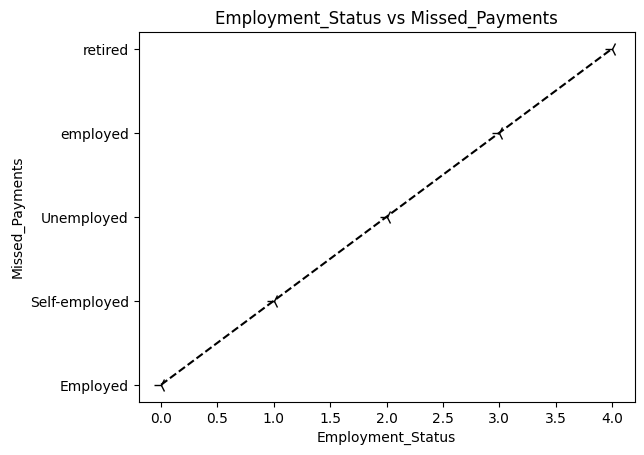

In [32]:
Employment_Status=["Employed","Self-employed","Unemployed","employed","retired"]
Missed_Payments=[0,1,2,3,4]
plt.plot(Missed_Payments,Employment_Status,marker="3",markersize=10,color="black",linestyle="--")
plt.title("Employment_Status vs Missed_Payments")
plt.xlabel("Employment_Status")
plt.ylabel("Missed_Payments")
plt.show()


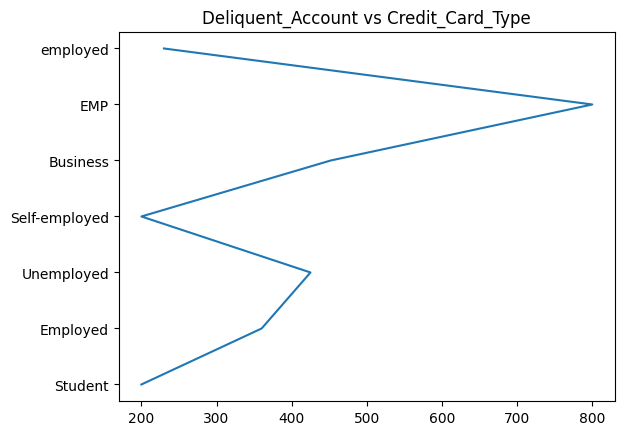

In [72]:
Delinquent_Account=[200,360,425,200,452,800,230]
Credit_Card_Type=["Student","Employed","Unemployed","Self-employed","Business","EMP","employed"]
plt.plot(Delinquent_Account,Credit_Card_Type)
plt.title("Deliquent_Account vs Credit_Card_Type")
plt.show()


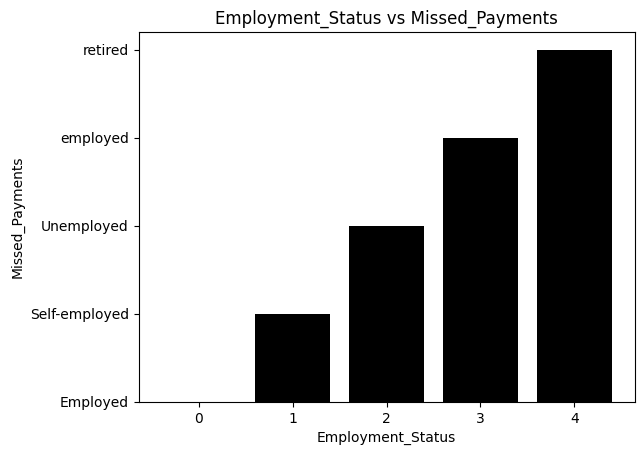

In [37]:
Employment_Status=["Employed","Self-employed","Unemployed","employed","retired"]
Missed_Payments=[0,1,2,3,4]
plt.bar(Missed_Payments,Employment_Status,color="black")
plt.title("Employment_Status vs Missed_Payments")
plt.xlabel("Employment_Status")
plt.ylabel("Missed_Payments")
plt.show()


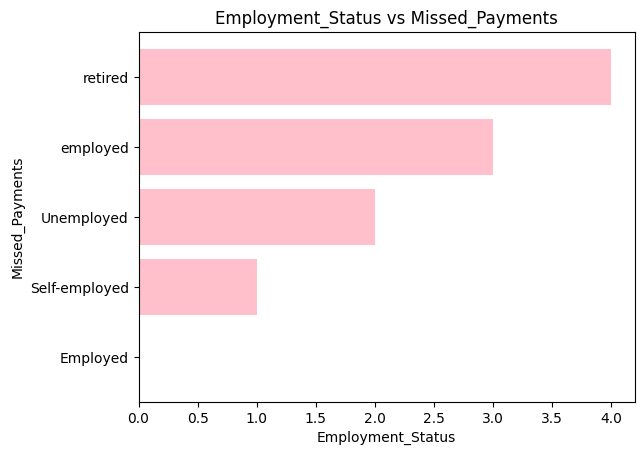

In [42]:
Employment_Status=["Employed","Self-employed","Unemployed","employed","retired"]
Missed_Payments=[0,1,2,3,4]
plt.barh(Employment_Status,Missed_Payments,color="pink")
plt.title("Employment_Status vs Missed_Payments")
plt.xlabel("Employment_Status")
plt.ylabel("Missed_Payments")
plt.show()


In [ ]:
Delinquent_Account,Month_6

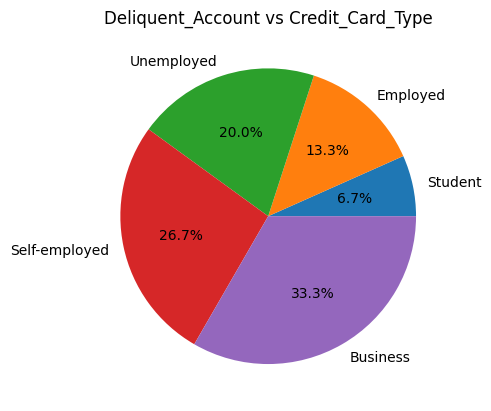

In [56]:
Delinquent_Account=[5,10,15,20,25]
Credit_Card_Type=["Student","Employed","Unemployed","Self-employed","Business"]
plt.pie(Delinquent_Account,labels=Credit_Card_Type,autopct="%1.1f%%")
plt.title("Deliquent_Account vs Credit_Card_Type")
plt.show()


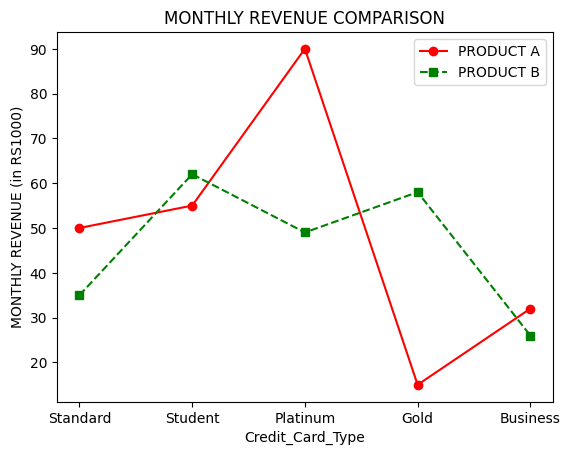

In [83]:
Credit_Card_Type=["Standard","Student","Platinum","Gold","Business"]
product_A_revenue=[50,55,90,15,32]
product_B_revenue=[35,62,49,58,26]

plt.plot(Credit_Card_Type,product_A_revenue,marker="o",linestyle="-",color="red",label="PRODUCT A")
plt.plot(Credit_Card_Type,product_B_revenue,marker="s",linestyle="--",color="green",label="PRODUCT B")

plt.xlabel("Credit_Card_Type")
plt.ylabel("MONTHLY REVENUE (in RS1000)")
plt.title("MONTHLY REVENUE COMPARISON")


plt.legend()
plt.savefig(r"C:\Users\HEMA M\OneDrive\Desktop\Credit_card_Type.png")


plt.show()

In [77]:
import pandas as pd

In [79]:
 df=pd.read_csv(r"/content/Delinquency_prediction_dataset .csv")

In [80]:
df.dtypes


,0
Customer_ID,object
Age,int64
Income,float64
Credit_Score,float64
Credit_Utilization,float64
Missed_Payments,int64
Delinquent_Account,int64
Loan_Balance,float64
Debt_to_Income_Ratio,float64
Employment_Status,object


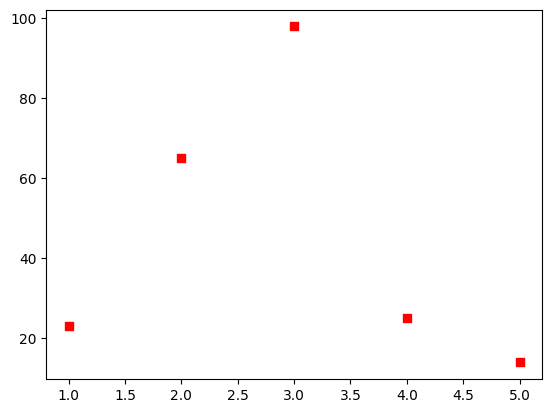

In [81]:
x=[1,2,3,4,5]
y=[23,65,98,25,14]

plt.scatter(x,y,marker="s",color="r")

plt.show()